# Caso de estudio: Choques y siniestros de Nuevo León.

## Análisis de los datos

Elaborado por: Nemesio Navarro Arámbula

### Librerías

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

from folium import Map
from folium import GeoJson
from folium.plugins import HeatMap

### Importar datos

In [2]:
data = pd.read_csv("siniestros_cleaned.csv")
data

,FOLIO_ID,LAT,LONG,CODIGO POSTAL,CALLE,COLONIA,CAUSA SINIESTRO,TIPO VEHICULO,COLOR,MODELO_VEHICULO,NIVEL DAÑO VEHICULO,PUNTO DE IMPACTO,AÑO,MES,DÍA NUMERO,DIA,HORA,DATE
0,D00005,NaN,NaN,NaN,UBERP3,UBERP3,HUELGAS Y ALBOROTOS,Auto,NEGRO,2016.0,Medio,NaN,2018,1,3,MIERCOLES,16,2018-01-03
1,D00007,25.660916,-100.282504,64820.0,AVENIDA REVOLUCIÓN,AVENIDA REVOLUCIÓN,COLISION Y/O VUELCO,Auto,PLATA,2006.0,NaN,NaN,2018,1,22,LUNES,12,2018-01-22
2,D00011,25.724544,-100.373691,64619.0,ABEDUL,ABEDUL,COLISION Y/O VUELCO,Auto,ROJO,2015.0,Bajo,Costado der central,2018,1,1,LUNES,0,2018-01-01
3,D00012,25.631471,-100.300988,64760.0,ALFONSO REYES,ALFONSO REYES,COLISION Y/O VUELCO,Auto,BLANCO,2000.0,Sin daño,Costado izq delantero,2018,1,1,LUNES,2,2018-01-01
4,D00019,25.728476,-100.333627,64250.0,PABLO HERNÁNDEZ,PABLO HERNÁNDEZ,COLISION Y/O VUELCO,Auto,BLANCO,2015.0,Bajo,Costado izq delantero,2018,1,1,LUNES,9,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,D116002,NaN,NaN,NaN,PROV. 19278 / CARLOS ALBERTO ALEJANDRO HERNAND...,PROV. 19278 / CARLOS ALBERTO ALEJANDRO HERNAND...,COLISION Y/O VUELCO,Auto,AZUL,2007.0,Bajo,Costado der delantero,2016,1,10,DOMINGO,22,2016-01-10
43426,D116003,NaN,NaN,NaN,PROV. 19765 / ROEL FRANCISCO SALINAS MADRIGAL ...,PROV. 19765 / ROEL FRANCISCO SALINAS MADRIGAL ...,COLISION Y/O VUELCO,Auto,GRIS,2008.0,Sin daño,NaN,2016,3,6,DOMINGO,22,2016-03-06
43427,D116004,25.660844,-100.312296,64720.0,SAN LUIS POTOSÍ,SAN LUIS POTOSÍ,COLISION Y/O VUELCO,Auto,GRIS,2008.0,Bajo,Costado der trasero,2016,8,30,MARTES,21,2016-08-30
43428,D116012,25.745930,-100.360152,64330.0,TLATELOLCO,TLATELOLCO,COLISION Y/O VUELCO,Auto,VINO /DORA,2003.0,Sin daño,Costado der trasero,2016,12,29,JUEVES,19,2016-12-29


### Heatmap siniestros

In [3]:
map_df = data[['LAT','LONG']]
map_df = map_df.dropna()
map_df

,LAT,LONG
1,25.660916,-100.282504
2,25.724544,-100.373691
3,25.631471,-100.300988
4,25.728476,-100.333627
5,25.762693,-100.412453
...,...,...
43422,25.186721,-100.731973
43423,25.025557,-100.549290
43424,25.593055,-100.878383
43427,25.660844,-100.312296


In [4]:
# Limites establecidos en la limpieza
map_limits = (map_df.LAT.min(),   map_df.LONG.max(),      
         map_df.LONG.min(), map_df.LAT.max())
map_limits

(25.0255568, -100.0019534, -100.91963790000001, 25.9775366)

In [5]:
# Creación del mapa
for_map = Map(location=[25.6714, -100.309], zoom_start=12, )

In [6]:
# Heatmap
hm_wide = HeatMap(
    list(zip(map_df.LAT.values, map_df.LONG.values)),
    min_opacity=0.2,
    radius=17, 
    blur=15, 
    max_zoom=1,
)

In [7]:
for_map.add_child(hm_wide)

### Siniestros por dia

#### Serie de tiempo

In [8]:
# Obtener fechas en orden
dates = data['DATE']
dates = dates.sort_values()
dates = dates.reset_index(drop=True)
dates

0        2016-01-01
1        2016-01-01
2        2016-01-01
3        2016-01-01
4        2016-01-01
            ...    
43425    2018-06-30
43426    2018-06-30
43427    2018-06-30
43428    2018-06-30
43429    2018-06-30
Name: DATE, Length: 43430, dtype: object

In [9]:
# Frecuencia de siniestros por fecha
sin_per_day = dates.value_counts().sort_index()
sin_per_day

2016-01-01    24
2016-01-02    34
2016-01-03    22
2016-01-04    48
2016-01-05    57
              ..
2018-06-26    33
2018-06-27    44
2018-06-28    54
2018-06-29    42
2018-06-30    40
Name: DATE, Length: 911, dtype: int64

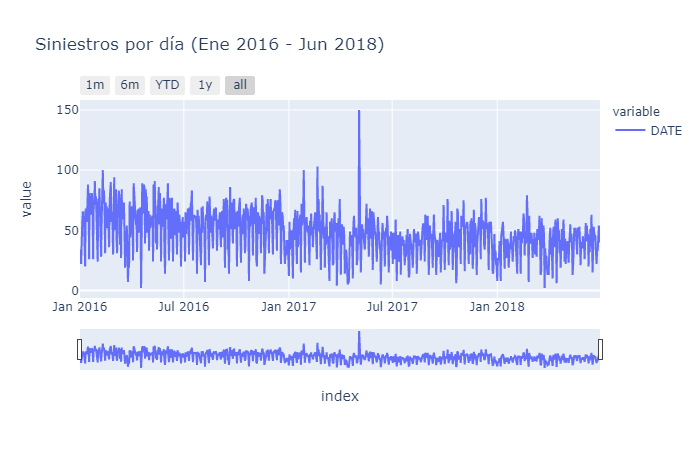

In [10]:
# Grafica siniestros por dia

fig = px.line(sin_per_day, title='Siniestros por día (Ene 2016 - Jun 2018)')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show("png")

#### Heatmap

In [11]:
# Obtener mes (número) y día (número)
datos_heatmap = data[data['AÑO'] != 2018.0]
datos_heatmap = datos_heatmap[['MES','DÍA NUMERO']]
datos_heatmap = datos_heatmap.sort_values(['MES','DÍA NUMERO'], ascending=[True,True])

In [12]:
# Datos heatmap
freq_datos_hm = datos_heatmap.value_counts().sort_index()
freq_datos_hm= freq_datos_hm.reset_index()
freq_datos_hm.columns = ['MES', 'DÍA NUMERO', 'SINIESTROS']

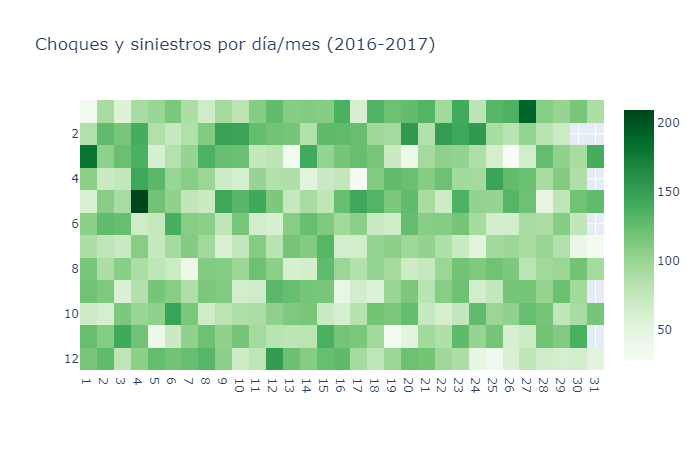

In [13]:
fig = go.Figure(data=go.Heatmap(
        z=freq_datos_hm['SINIESTROS'],
        x=freq_datos_hm['DÍA NUMERO'],
        y=freq_datos_hm['MES'],
        colorscale='greens',
        hovertemplate='Día: %{x}<br>Mes: %{y}<br>Siniestros: %{z}<extra></extra>'
    )
)

fig.update_yaxes(autorange="reversed")

fig.update_layout(
    title='Choques y siniestros por día/mes (2016-2017)',
    xaxis_nticks=36)

fig.show("png")

### Choques por codigos postales

In [14]:
# Obtener codigos postales en orden
cps = data['CODIGO POSTAL']

In [15]:
# Frecuencia de codigos postales
freq_cps = cps.value_counts()
freq_cps.index = freq_cps.index.astype(int)
freq_cps.index = freq_cps.index.astype(str)
top_freq_cps = freq_cps.iloc[:10]

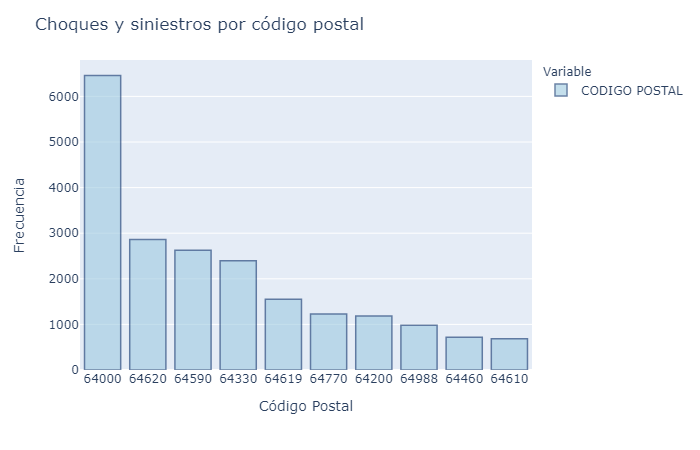

In [16]:
fig = px.bar(top_freq_cps,
                    labels={
                     "index": "Código Postal",
                     "value": "Frecuencia",
                     "variable": "Variable"
                 })

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(title_text='Choques y siniestros por código postal')

fig.show("png")

Los códigos postales con más siniestros y choques reportados son:

64000, 64620, 64590, 64330 y 64619.

Que representan las siguientes áreas:

Centro de Monterrey, Vista Hermosa, Churubusco, San Jorge y Cumbres 4to Sector Secc C.

**NOTA**: El dato de frecuencia para el código postal 64000 no es confiable, ya que las personas tienden a ingresar este código postal cuando no conocen el correcto del área donde estan, sin embargo coincide relativamente con el heatmap geográfico elaborado previamente por lo que se mantuvo en el análisis.

### Temporalidades de choques

Se analizó la temporalidades de choques por año, mes, día número, día y hora

#### Año

In [17]:
# Obtener columna de año
years = data['AÑO']

In [18]:
# Frecuencia de choques y siniestros por año
freq_year = years.value_counts()
freq_year.index = freq_year.index.astype(int)
freq_year.index = freq_year.index.astype(str)
freq_year

2016    20640
2017    15782
2018     7008
Name: AÑO, dtype: int64

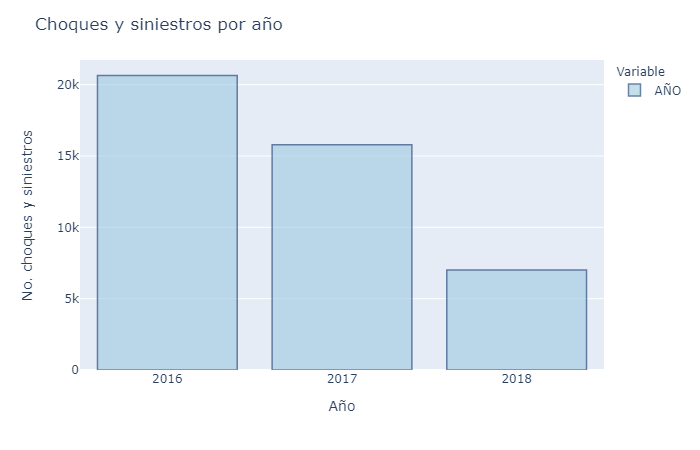

In [19]:
fig = px.bar(freq_year,
                    labels={
                     "index": "Año",
                     "value": "No. choques y siniestros",
                     "variable": "Variable"
                 })

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(title_text='Choques y siniestros por año')

fig.show("png")

Se observa como disminuyó la cantidad de choques y siniestros del año 2016 al 2017 y se mantuvo similar en 2018, debido a que solo contamos con 6 meses del 2018 y se tienen la mitad de choques y siniestros comparado con 2017.

Se puede realizar un gráfico con el mismo intervalo de tiempo (**Sección: Generación y validación de hipótesis**).

#### Mes

In [20]:
# Obtener columna de mes
months = data['MES']

In [21]:
# Frecuencia de choques y siniestros por mes
freq_mon = months.value_counts().sort_index()
freq_mon.index = freq_mon.index.astype(int)
freq_mon.index = freq_mon.index.astype(str)
freq_mon

1     4389
2     4463
3     4199
4     4118
5     4563
6     4130
7     2712
8     2965
9     2923
10    3016
11    2970
12    2982
Name: MES, dtype: int64

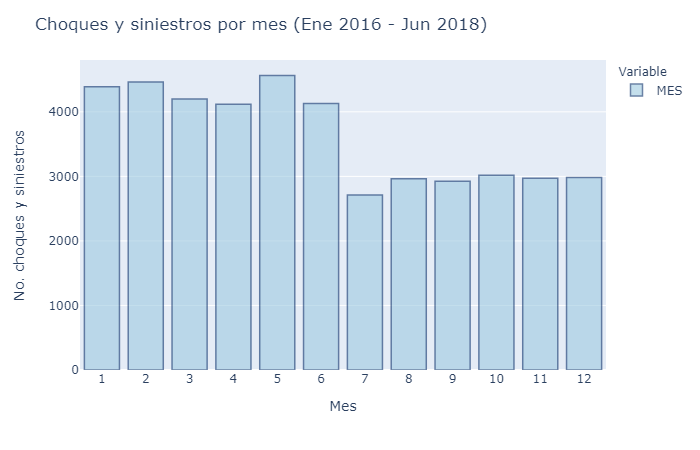

In [22]:
fig = px.bar(freq_mon,
                    labels={
                     "index": "Mes",
                     "value": "No. choques y siniestros",
                     "variable": "Variable"
                 })

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(title_text='Choques y siniestros por mes (Ene 2016 - Jun 2018)')

fig.show("png")

Al igual que en el análisis por año, se puede observar un desbalance en los datos, esto debido a que 2018 no cuenta con la segunda mitad del año. Por lo que se optó por realizar el análisis de temporalidad (mes) sin el año 2018.

In [23]:
# Filtrar base de datos para 2016-2017
mon_tyc = data[data['AÑO'] != 2018.0]
mon_tyc = mon_tyc['MES']

In [24]:
# Frecuencia de choques y siniestros por mes (2016-2017)
freq_mon_tyc = mon_tyc.value_counts().sort_index()
freq_mon_tyc.index = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                      'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Novimebre', 'Diciembre']
freq_mon_tyc

Enero         3290
Febrero       3251
Marzo         3084
Abril         2936
Mayo          3384
Junio         2909
Julio         2712
Agosto        2965
Septiembre    2923
Octubre       3016
Novimebre     2970
Diciembre     2982
Name: MES, dtype: int64

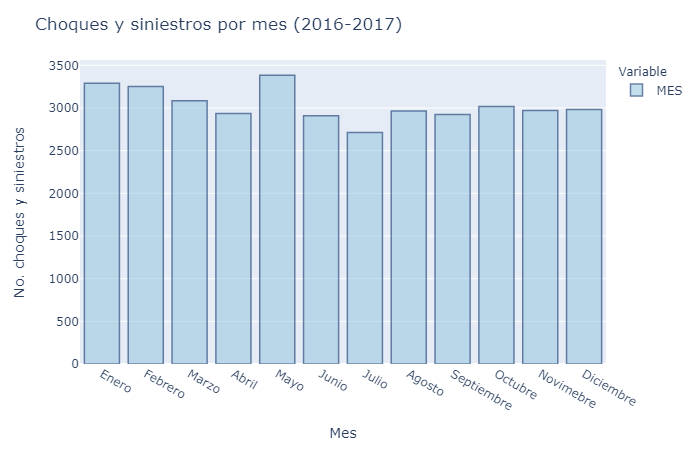

In [25]:
fig = px.bar(freq_mon_tyc,
                    labels={
                     "index": "Mes",
                     "value": "No. choques y siniestros",
                     "variable": "Variable"
                 })

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(title_text='Choques y siniestros por mes (2016-2017)')

fig.show("png")

La cantidad de choques y siniestros por mes no indica temporalidad, resalta Mayo como el mes con más choques y siniestros y el mes de Julio como el mes con menor choques y siniestros.

#### Día Número

In [26]:
# Obtener columna de dia numero
day_no = data['DÍA NUMERO']

In [27]:
# Frecuencia de choques y siniestros por numero de dia en el mes
freq_day_no = day_no.value_counts().sort_index()
freq_day_no.index = freq_day_no.index.astype(int)
freq_day_no.index = freq_day_no.index.astype(str)

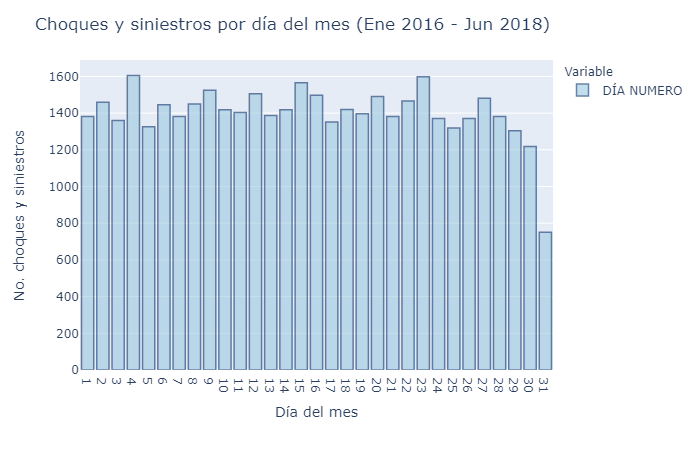

In [28]:
fig = px.bar(freq_day_no,
                    labels={
                     "index": "Día del mes",
                     "value": "No. choques y siniestros",
                     "variable": "Variable"
                 })

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(title_text='Choques y siniestros por día del mes (Ene 2016 - Jun 2018)')

fig.show("png")

En cuanto a los choques y siniestros en los días se observa una cantidad muy baja los días 31 del mes.

#### Día de la semana

In [29]:
# Convertir 'DIA' (semanal) en variable categorica
data['DIA'] = pd.Categorical(data['DIA'], ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO', 'DOMINGO'])

# Obtener columna de dia de la semana
day_week = data['DIA']

In [30]:
# Frecuencia de choques y siniestros por dia de la semana
freq_day_week = day_week.value_counts().sort_index()
freq_day_week

LUNES        6652
MARTES       7052
MIERCOLES    7000
JUEVES       6886
VIERNES      7384
SABADO       5759
DOMINGO      2697
Name: DIA, dtype: int64

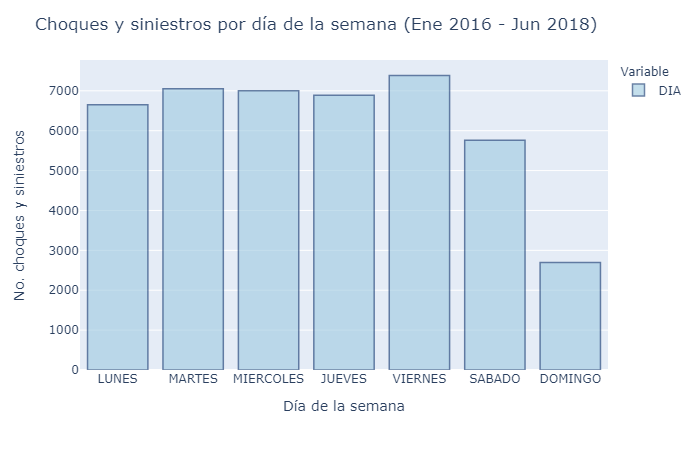

In [31]:
fig = px.bar(freq_day_week,
                    labels={
                     "index": "Día de la semana",
                     "value": "No. choques y siniestros",
                     "variable": "Variable"
                 })

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(title_text='Choques y siniestros por día de la semana (Ene 2016 - Jun 2018)')

fig.show("png")

En la gráfica anterior se puede observar claramente una temporalidad en cuanto a día de la semana:

* Los choques y siniestros los viernes son altos a comparación de los demás días.
* Los choques y siniesrtos son muy bajos los días sábados y aún más bajos los domingos.

#### Hora

In [32]:
# Obtener columna de hora
hours = data['HORA']

In [33]:
# Frecuencia de choques y siniestros por hora
freq_hour = hours.value_counts().sort_index()

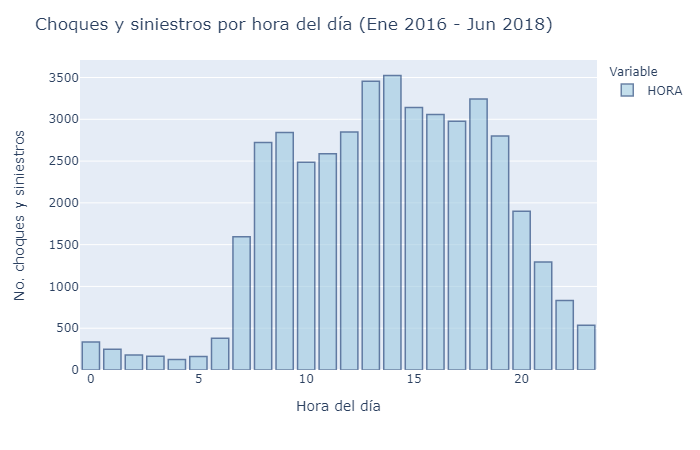

In [34]:
fig = px.bar(freq_hour,
                    labels={
                     "index": "Hora del día",
                     "value": "No. choques y siniestros",
                     "variable": "Variable"
                 })

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(title_text='Choques y siniestros por hora del día (Ene 2016 - Jun 2018)')

fig.show("png")

Se puede observar una temporalidad en tres horarios diferentes, entre las 8 y 9 de la mañana existe un pico de choques y siniestros, esto puede ser debido a la salida de casa para conducir al trabajo; por otro lado el pico más alto esta entre las 13 y 14 horas, la cual es la hora de comida; por último a las 18 horas se puede observar otro pico el cual indica un aumento en los choques y siniestros debido a la salida o el regreso a casa de los conductores.

### Diferencia significativa en el tipo de vehículo

In [35]:
# Obtener tipo de vehiculo
tipo_vehiculo = data['TIPO VEHICULO']

In [36]:
# Frecuencia de choques y siniestros por tipo de vehiculo
freq_tv = tipo_vehiculo.value_counts()

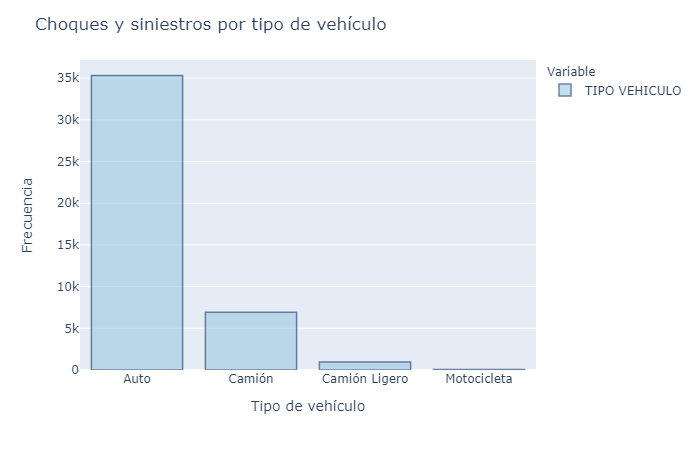

In [37]:
fig = px.bar(freq_tv,
                    labels={
                     "index": "Tipo de vehículo",
                     "value": "Frecuencia",
                     "variable": "Variable"
                 })

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(title_text='Choques y siniestros por tipo de vehículo')

fig.show("png")

Si hay una diferencia significativa en el tipo de vehiculo, la mayoría de los choques y siniestros son de autos, esto se debe mayormente a que hay más autos circulando que camiones o motocicletas, es por esto que se ve esta gran diferencia.

### Color de vehiculo en choques y siniestros

In [38]:
# Obtener color de vehiculo
color_vehiculo = data['COLOR']

In [39]:
# Frecuencia de choques y siniestros por color de vehiculo
freq_color = color_vehiculo.value_counts(normalize=True) * 100
top_freq_color = freq_color.iloc[:12]
top_freq_color

BLANCO      32.050237
GRIS        18.785097
ROJO         9.844584
PLATA        9.096628
NEGRO        7.556446
AZUL         6.556842
NARANJA      3.837640
GUINDA       2.761144
AMARILLO     2.453573
VERDE        2.437263
CAFE         1.276883
MORADO       0.118834
Name: COLOR, dtype: float64

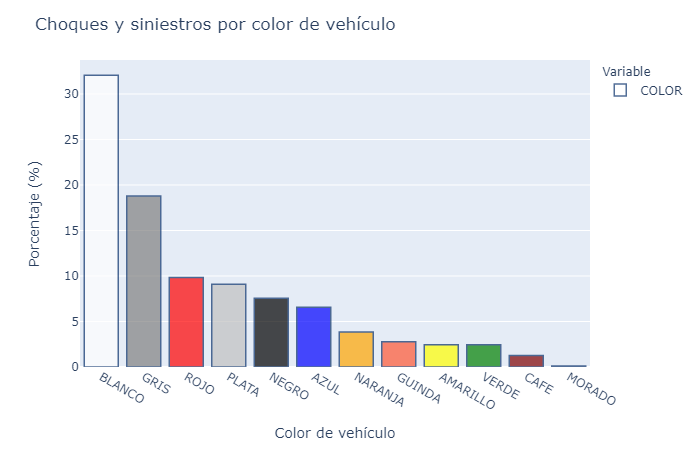

In [40]:
fig = px.bar(top_freq_color,
                    labels={
                     "index": "Color de vehículo",
                     "value": "Porcentaje (%)",
                     "variable": "Variable"
                 })

bar_colors = ['rgb(255,255,255)', 'rgb(128,128,128)', 'rgb(255,0,0)', 'rgb(192,192,192)',
              'rgb(0,0,0)', 'rgb(0,0,255)', 'rgb(255,165,0)', 'rgb(255,87,51)', 'rgb(255,255,0)',
              'rgb(0,128,0)', 'rgb(128,0,0)', 'rgb(128,0,128)']

fig.update_traces(marker_color=bar_colors, marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.7)

fig.update_layout(title_text='Choques y siniestros por color de vehículo')

fig.show("png")

A primera vista la respuesta por la gráfica sería que un vehículo de color blanco, gris, rojo o negro es más propenso a chocar, sin embargo, Axalta publicó un reporte sobre cuáles han sido los colores de auto más populares el año 2020. El color favorito fue blanco (38%), seguido de negro (19%), gris (15%) y plata (9%). Juntos acumulan el 81% de las ventas de autos en el mundo. Porcentajes muy similares a los de la gráfica previa, por lo tanto, podemos inferir que hay más vehículos de estos colores circulando por ende son los colores más frecuentes en choques y siniestros.

Referencia: https://newsroom.axalta.com/2020-12-14-Axalta-continues-automotive-color-leadership-with-68th-Global-Automotive-Color-Popularity-Report

### Gráficos efectivos para comunicar estadísticas a un asegurador de coches

#### Modelo vehiculo

In [41]:
# Obtener modelo de vehiculo
modelo_vehiculo = data['MODELO_VEHICULO']

In [42]:
# Frecuencia de choques y siniestros por modelo de vehiculo
freq_mv = modelo_vehiculo.value_counts()
freq_mv.index = freq_mv.index.astype(int)
freq_mv.index = freq_mv.index.astype(str)
top_freq_mv = freq_mv.iloc[:20]
top_freq_mv = top_freq_mv.sort_index(ascending=False)

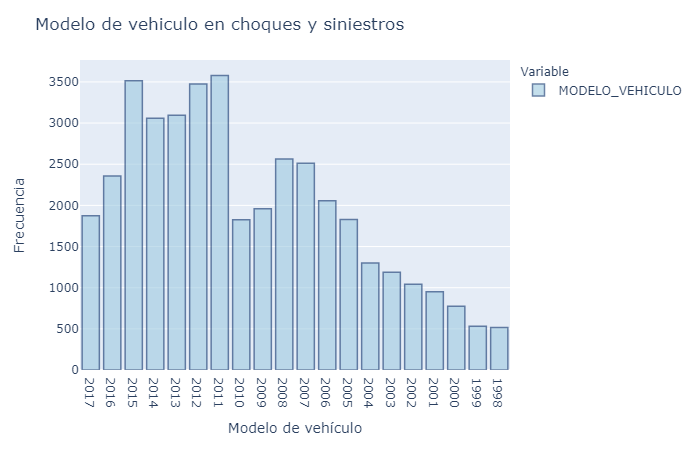

In [43]:
fig = px.bar(top_freq_mv,
                    labels={
                     "index": "Modelo de vehículo",
                     "value": "Frecuencia",
                     "variable": "Variable"
                 })

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(title_text='Modelo de vehiculo en choques y siniestros')

fig.show("png")

Este gráfico sería util para el calculo del costo del seguro, ya que se podría tomar en cuenta el modelo del vehículo al momento de ofrecer el seguro, es decir, imponer cuotas más costosas para los vehículos cuyo modelo se ve más seguido en choques y siniestros.

#### Nivel daño vehiculo

In [44]:
# Convertir 'NIVEL DAÑO VEHICULO' en variable categorica
data['NIVEL DAÑO VEHICULO'] = pd.Categorical(data['NIVEL DAÑO VEHICULO'], ['Sin daño', 'Bajo', 'Medio', 'Alto'])

# Obtener nivel de daño del vehiculo
niveld_vehiculo = data['NIVEL DAÑO VEHICULO']

In [45]:
# Frecuencia de choques y siniestros por nivel de daño del vehiculo
freq_ndv = niveld_vehiculo.value_counts().sort_index()
freq_ndv

Sin daño    16734
Bajo        23110
Medio         442
Alto           78
Name: NIVEL DAÑO VEHICULO, dtype: int64

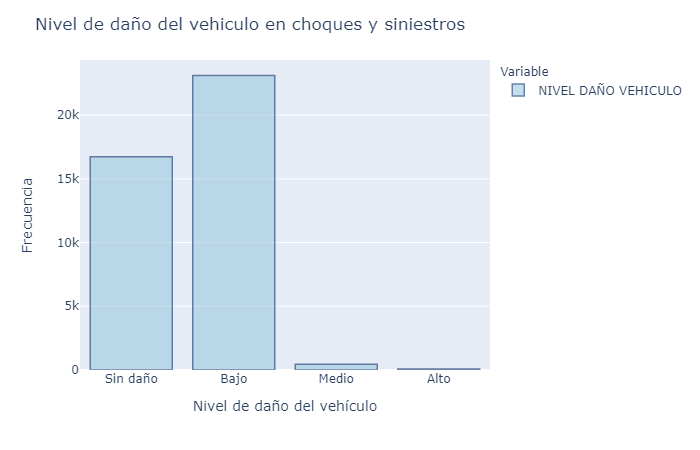

In [46]:
fig = px.bar(freq_ndv,
                    labels={
                     "index": "Nivel de daño del vehículo",
                     "value": "Frecuencia",
                     "variable": "Variable"
                 })

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(title_text='Nivel de daño del vehiculo en choques y siniestros')

fig.show("png")

Esta gráfica es relevante para una aseguradora debido a que con esta información se puede estimar el coste total aproximado de los daños y así planear el presupuesto de la empresa para los siniestros de cada año.

### Cruce con otras bases de datos

#### Datos del conductor

Sería interesante que cada siniestro o choque contara con los datos personales del conductor, entre ellos sería interesante la edad, el sexo, etc. Esto con la finalidad de comparar grupos de estas variables.

#### Estado del conductor

Obtener el estado del conductor para hacer cálculos como tasa de heridos y/o de fatalidad, además de encontrar una relación con otra variable.

#### Clima

Obtener datos meteorológicos durante el día y lugar del siniestro nos permite tener un entendimiento más completo sobre el accidente.

### Generación y validación de hipótesis

#### Hipótesis 1: Los choques han aumentado con el tiempo

Se filtraron los primeros 6 meses de cada año debido a que no se tiene el segundo semestre de 2018

In [47]:
# Filtrar base de datos para los primeros 6 meses de cada año
six_month_comp = data[data['MES'] < 7]
six_month_comp = six_month_comp['AÑO']

In [48]:
# Obtener la frecuencia de choques y siniestros para los primeros 6 meses de cada año
freq_year_smc = six_month_comp.value_counts()
freq_year_smc.index = freq_year_smc.index.astype(int)
freq_year_smc.index = freq_year_smc.index.astype(str)
freq_year_smc

2016    10688
2017     8166
2018     7008
Name: AÑO, dtype: int64

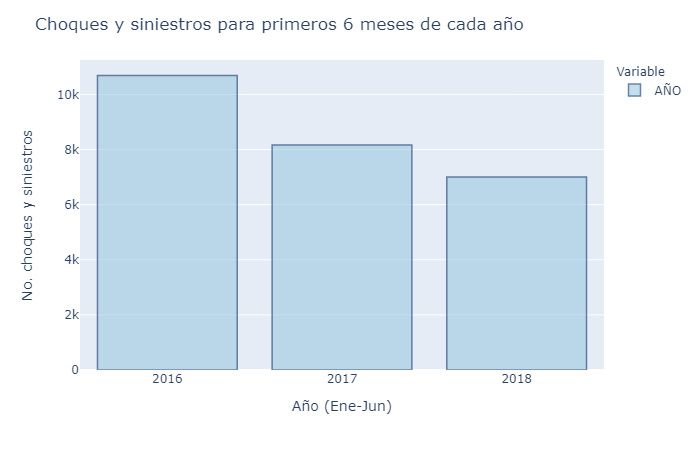

In [49]:
fig = px.bar(freq_year_smc,
                    labels={
                     "index": "Año (Ene-Jun)",
                     "value": "No. choques y siniestros",
                     "variable": "Variable"
                 })

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(title_text='Choques y siniestros para primeros 6 meses de cada año')

fig.show("png")

In [50]:
# Calcular porcentaje de disminución
perc_16_17 = round(abs((freq_year_smc[1] - freq_year_smc[0]) / freq_year_smc[0]) * 100,2)
perc_17_18 = round(abs((freq_year_smc[2] - freq_year_smc[1]) / freq_year_smc[1]) * 100,2)
print("Disminución del " + str(perc_16_17) + "% en cantidad de choques y siniestros del año 2016 al 2017")
print("Disminución del " + str(perc_17_18) + "% en cantidad de choques y siniestros del año 2017 al 2018")

Disminución del 23.6% en cantidad de choques y siniestros del año 2016 al 2017
Disminución del 14.18% en cantidad de choques y siniestros del año 2017 al 2018


Esta hipótesis no es verdadera debido a que tomando un mismo intervalo de tiempo para cada año, los accidentes han disminuido de 2016 a 2018 con porcentajes significativos, mencionados previamente.

#### Hipótesis 2: Los viernes de quincena hay más tráfico de lo normal

Se tomaron días anteriores a el 15 debido a que hay probabilidad que este sea sábado o domingo y se les entrega la quincena unos días antes.

In [51]:
# Filtrar por viernes quincenales (viernes 12-16) y viernes no quincenales
viernes_quincena1 = data[data['DIA']=='VIERNES'][data["DÍA NUMERO"] <= 16][data["DÍA NUMERO"] >= 12]
viernes_quincena2 = data[data['DIA']=='VIERNES'][data["DÍA NUMERO"] <= 31][data["DÍA NUMERO"] >= 28]
viernes_quincena = viernes_quincena1.append(viernes_quincena2)

viernes_no_quincena = data.drop(viernes_quincena.index)

<ipython-input-51-102e845cffaa>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-51-102e845cffaa>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-51-102e845cffaa>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-51-102e845cffaa>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [52]:
media_cys_quin = np.mean(viernes_quincena['DATE'].value_counts())
media_cys_no_quin = np.mean(viernes_no_quincena['DATE'].value_counts())
print("Media de choques y siniestros para viernes de quincena (viernes en días 12, 13, 14, 15, 28, 29, 30 y 31:",media_cys_quin)
print("Media de choques y siniestros para viernes no en quincena:",media_cys_no_quin)
print("Diferencia de choques:",media_cys_quin-media_cys_no_quin)

Media de choques y siniestros para viernes de quincena (viernes en días 12, 13, 14, 15, 28, 29, 30 y 31: 55.02777777777778
Media de choques y siniestros para viernes no en quincena: 47.370285714285714
Diferencia de choques: 7.6574920634920645


Esta hipótesis no se rechaza, ya que se puede observar una diferencia de medias significativa, de más de 7 choques y siniestros, entre viernes de quincena y viernes en cualquier otro día del mes.

#### Hipótesis 3: La semana antes de navidad hay más tráfico de lo normal

Se tomaron 7 días anteriores a el 25 de diciembre (1 semana antes de navidad) para calcular el promedio de choques y siniestros, por otro lado, se tomaron los días restantes de diciembre para calcular la diferencia de promedio de choques y siniestros.

In [53]:
# Filtrar por semana antes de navidad (Diciembre 18-24)
semana_navidad = data[data['MES']==12][data["DÍA NUMERO"] < 25][data["DÍA NUMERO"] >= 18]
semanas_no_navidad = data.drop(semana_navidad.index)

<ipython-input-53-ee6bb611840a>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-53-ee6bb611840a>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [54]:
media_cys_navi = np.mean(semana_navidad['DATE'].value_counts())
media_cys_no_navi = np.mean(semanas_no_navidad['DATE'].value_counts())
print("Media de choques y siniestros para semana antes de navidad (Diciembre en días 18, 19, 20, 21, 22, 23 y 24:",media_cys_navi)
print("Media de choques y siniestros para semanas restantes de Diciembre:",media_cys_no_navi)
print("Diferencia de choques:",media_cys_navi-media_cys_no_navi)

Media de choques y siniestros para semana antes de navidad (Diciembre en días 18, 19, 20, 21, 22, 23 y 24: 46.5
Media de choques y siniestros para semanas restantes de Diciembre: 47.69119286510591
Diferencia de choques: -1.1911928651059114


Esta hipótesis no se puede aceptar, ya que la diferencia de medias es cercana a 0 entre la semana antes de navidad y cualquier otra semana de diciembre.